In [1]:
import cv2

import json
import matplotlib.pyplot as plt
import numpy as np


account_name = 'test_yunnature'
visualize_dir = './palette_result_visualize/'+account_name

import os
os.makedirs(visualize_dir, exist_ok=True)

## Load Log file (.txt)

In [2]:
with open(f'../data/{account_name}_ExtractLog.txt', 'r') as log_fp:
    log_list = log_fp.readlines()
    error_files = [item.strip().split(': ')[1] for item in log_list if item.strip().startswith('>>> Error in ') ]
    warning_files = [item.strip().split(': ')[1] for item in log_list if item.strip().startswith('>>> Warning in ') ]
    pass

print('No of Errors :', len(error_files))
print('No of Warnings :', len(warning_files))
print('\n\nerror files : ')

error_files[:6]

No of Errors : 6
No of Warnings : 4


error files : 


['../data/pictures_yunnature/yunnature_038_1984Likes.png',
 '../data/pictures_yunnature/yunnature_129_3676Likes.png',
 '../data/pictures_yunnature/yunnature_123_1596Likes.png',
 '../data/pictures_yunnature/yunnature_083_5631Likes.png',
 '../data/pictures_yunnature/yunnature_119_1316Likes.png',
 '../data/pictures_yunnature/yunnature_064_1321Likes.png']

## Load Palettes (.json)

In [3]:
with open(f'../data/{account_name}.json', 'r') as json_fp:
    palette_dict = json.load(json_fp)
    pass

for idx, item in enumerate(palette_dict.items()):
    print(f'>>> file : {item[0]}\n')
    print(f'>>> back_cols : {item[1][0]}\n')
    print(f'>>> fore_cols : {item[1][1]}\n\n')
    if idx == 0:
        break

>>> file : yunnature_116_1259Likes.png

>>> back_cols : [[219, 203, 188], [211, 188, 165], [177, 116, 78], [214, 142, 94], [192, 165, 142], [164, 132, 109], [231, 173, 132], [99, 85, 78], [59, 47, 41], [241, 236, 229]]

>>> fore_cols : [[207, 192, 186], [220, 205, 198], [68, 67, 77], [234, 220, 211], [83, 81, 87], [246, 239, 234], [52, 51, 59], [194, 173, 165], [30, 30, 36], [173, 136, 120]]




## Load bbox list (.json)

In [4]:
with open(f'../data/{account_name}_bbox.json', 'r') as json_fp:
    bbox_dict = json.load(json_fp)
    pass

print(list(bbox_dict.items())[17])

print('\n >>> Warning file bboxes :')
warning_keys = [item.split('/')[-1] for item in warning_files]
for key in warning_keys:
    print(f'{key} -> {bbox_dict[key]}')

('yunnature_004_1585Likes.png', [[-20, 554, 996, 1376]])

 >>> Warning file bboxes :
yunnature_131_2204Likes.png -> [[296, 522, 422, 876], [617, 465, 689, 765]]
yunnature_120_1854Likes.png -> [[332, 1004, 448, 1308], [41, 1032, 57, 1074], [876, 1032, 888, 1056]]
yunnature_145_2532Likes.png -> [[220, 496, 1056, 1038], [99, 682, 291, 786], [565, 622, 615, 716], [144, 642, 196, 702], [194, 638, 234, 698], [806, 616, 826, 662]]
yunnature_141_1403Likes.png -> [[594, 442, 912, 872], [121, 300, 259, 704], [626, 298, 824, 508]]


## Visualize & Save all images that caused errors

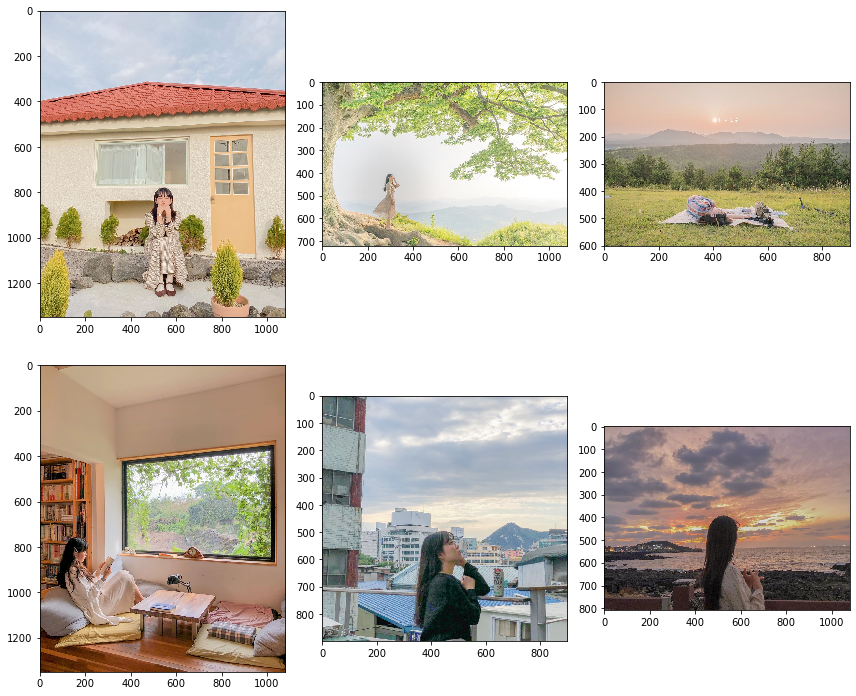

In [5]:
from math import ceil

ncol = 3
nrow = ceil(len(error_files)/ncol)
fig_width = ncol*4
fig_height = nrow*5

fig, axes = plt.subplots(nrow, ncol, figsize=(fig_width, fig_height))
for idx, file in enumerate(error_files):
    img = cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB)  # open & adjust RGB channels
    
    row_idx = idx//3
    col_idx = idx%3
    axes[row_idx, col_idx].imshow(img)
plt.tight_layout()

account_name = 'yunnature'  # only for test code
plt.savefig(visualize_dir+f'/error_pictures_{account_name}.png')
plt.show()

## Visualize & Save all images in palette_dict

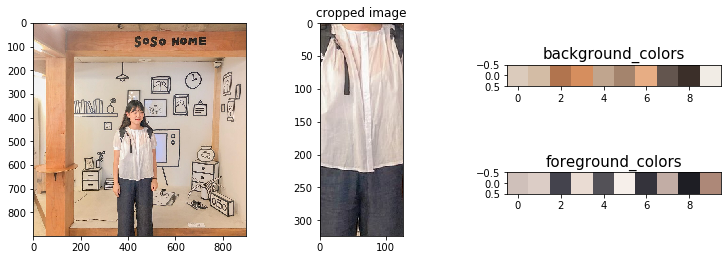

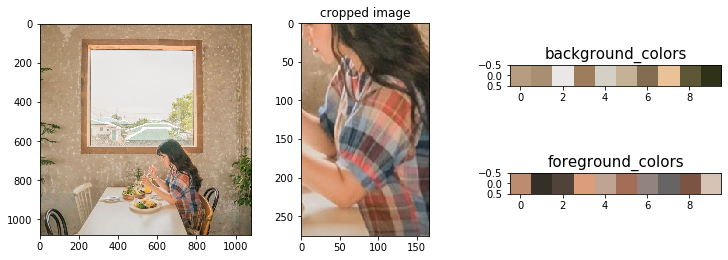

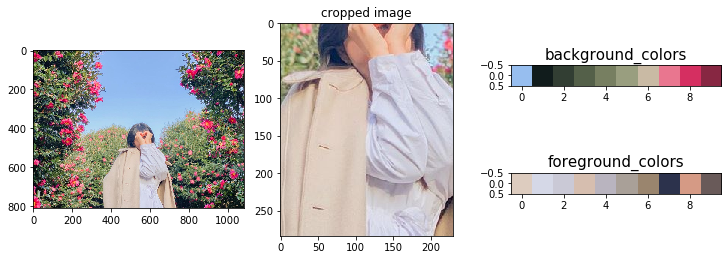

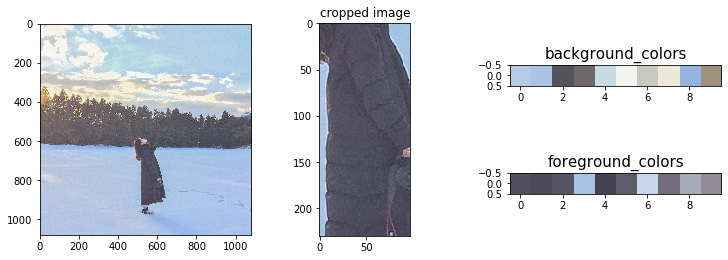

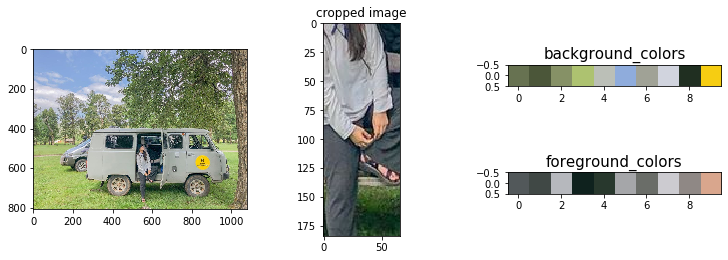

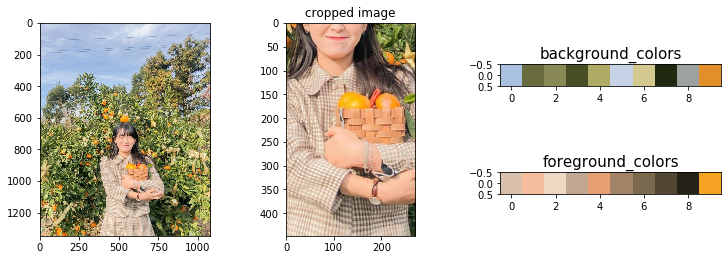

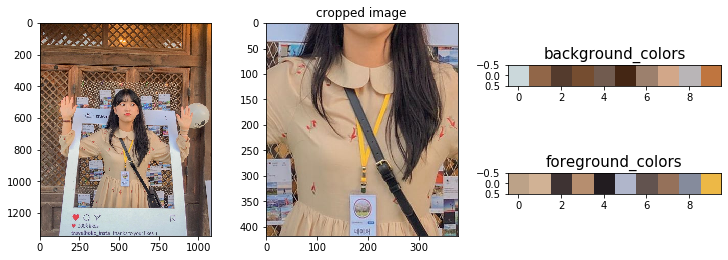

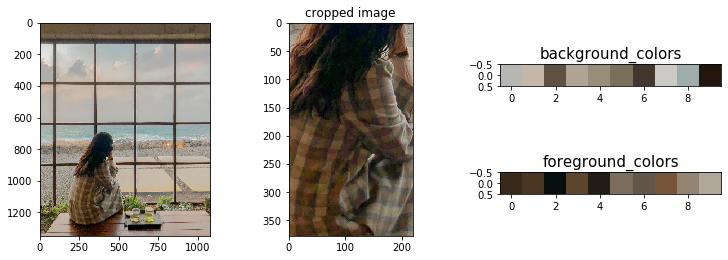

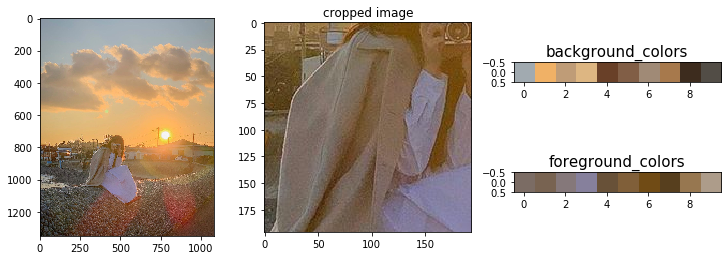

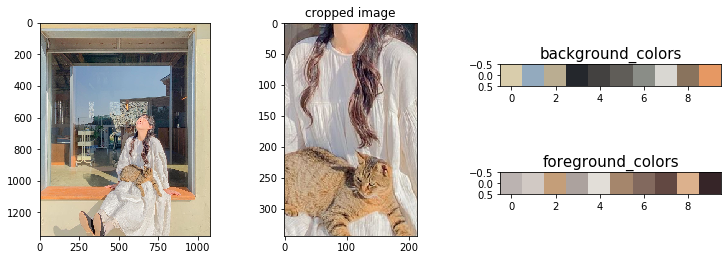

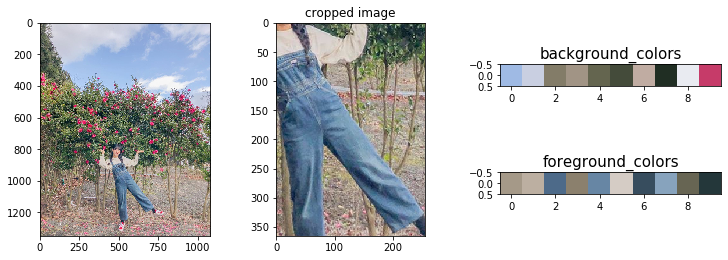

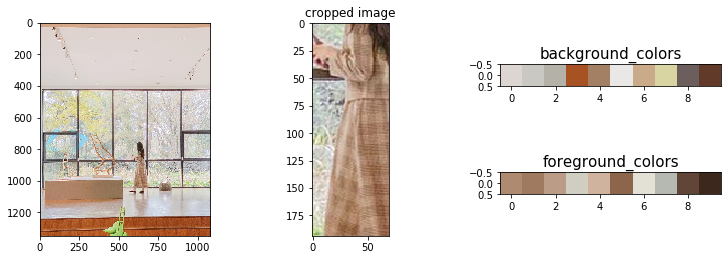

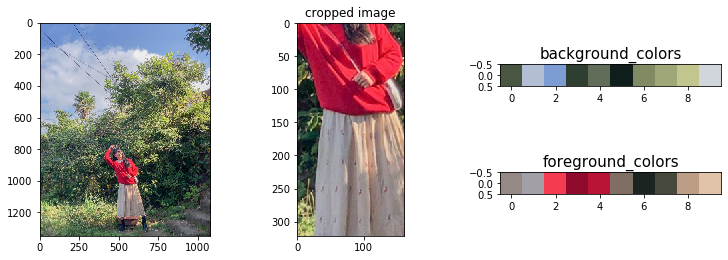

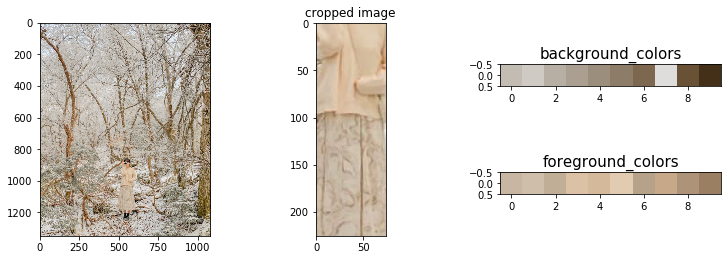

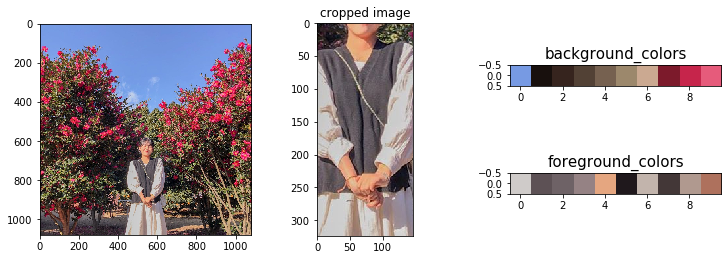

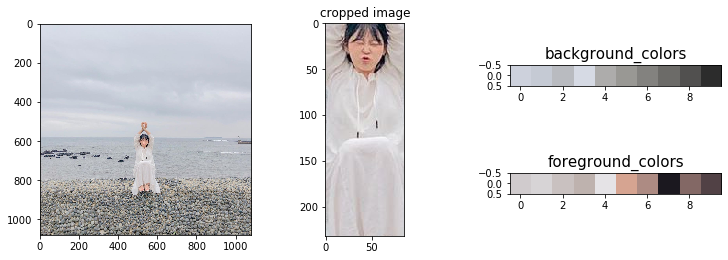

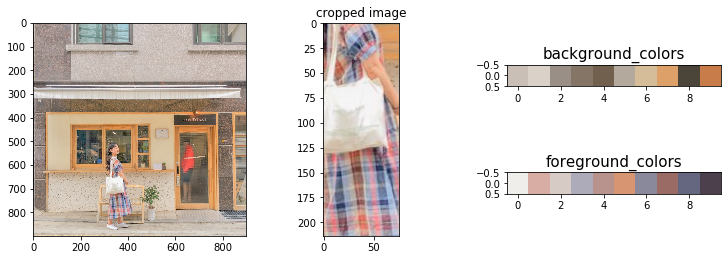

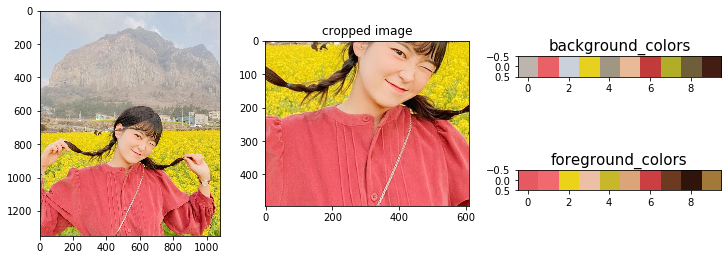

In [6]:
for idx, key in enumerate(palette_dict.keys()):
    if idx == 18:  # only for test code (only 18 files)
        break      # only for test code (only 18 files)
    
    # get extracted colors from palette_dict
    back_cols = np.expand_dims(np.array(palette_dict[key][0]), 0)
    fore_cols = np.expand_dims(np.array(palette_dict[key][1]), 0)
    
    # load image file
    file_path = f'../data/pictures_{account_name}/{key}'
    img = cv2.cvtColor(cv2.imread(file_path), cv2.COLOR_BGR2RGB)
    
    # crop image
    bbox = bbox_dict[key]
    x, y, x_end, y_end = bbox[0]
    y_edge = int((y_end - y) * 0.2)
    x_edge = int((x_end - x) * 0.2)
    img_cropped = img[ (y+y_edge):(y_end-y_edge), (x+x_edge):(x_end-x_edge) ]
    
    
    # Visualize the results
    fig_width = 10
    fig_height = 3.5
    fig = plt.figure(constrained_layout=True, figsize=(fig_width, fig_height))
    spec = fig.add_gridspec(2, 3)

    axe1 = fig.add_subplot(spec[:, 0]) # img
    axe1.imshow(img)

    axe2 = fig.add_subplot(spec[:, 1]) # img_cropped
    axe2.imshow(img_cropped)
    axe2.set_title('cropped image')

    axe3 = fig.add_subplot(spec[0, 2]) # background_arr
    axe3.imshow(back_cols)
    axe3.set_title('background_colors', size=15)

    axe4 = fig.add_subplot(spec[1, 2]) # foreground_arr
    axe4.imshow(fore_cols)
    axe4.set_title('foreground_colors', size=15)
    
    save_name = visualize_dir + f'/palette_{key}'
    if file_path in warning_files:
        save_name = visualize_dir + f'/palette_{key[:-4]}_(warning).png'
    
    plt.savefig(save_name)
    plt.show()